In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import statistics
from scipy import stats
import time


In [2]:
# READ DATASET
data = pd.read_csv(r"C:\Users\Suleman\Documents\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [50]:
diabetic_count = data[data['Outcome'] == 1].shape[0]
non_diabetic_count = data[data['Outcome'] == 0].shape[0]

# Print the counts
print("Number of diabetic patients:", diabetic_count)
print("Number of non-diabetic patients:", non_diabetic_count)

Number of diabetic patients: 268
Number of non-diabetic patients: 500


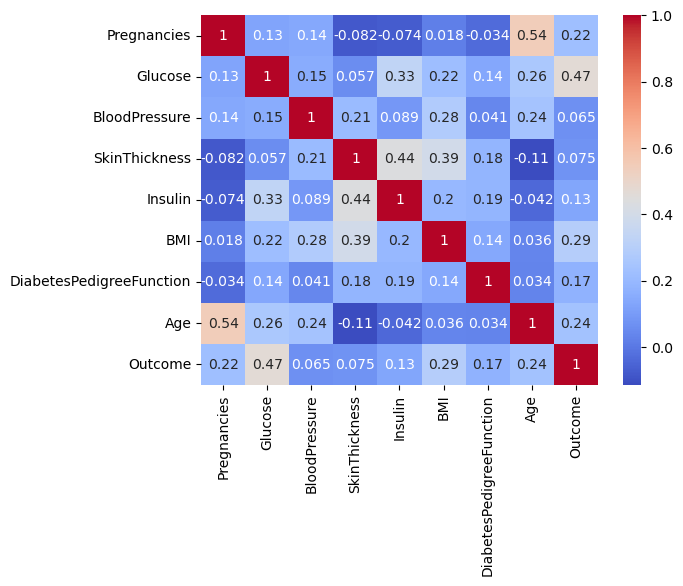

In [3]:
#CORELATIONAL MATRIX
corr_matrix = data.corr()
corr_matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [5]:
# define TACS and other variables
TACS = [1,0.44,0.075,0.13];
a = 35
b = 50

# filter the data based on skin thickness and insulin levels
data_CBS = data[(data.SkinThickness >= a) & (data.SkinThickness < b) & (data.Insulin >= 0) & (data.Insulin < 112)]

# filter the data based on TACS
data_TACS = data_CBS[data_CBS.Outcome.isin(TACS)]
data_TACS = data_TACS[['Age', 'SkinThickness', 'Glucose', 'Insulin', 'Pregnancies', 'BloodPressure','Outcome']]

# set X and X1 to the filtered data
X1 = data_TACS
X = X1
print (X1)

     Age  SkinThickness  Glucose  Insulin  Pregnancies  BloodPressure  Outcome
0     50             35      148        0            6             72        1
23    29             35      119        0            9             80        1
37    46             37      102        0            9             76        1
38    27             42       90        0            2             68        1
45    25             39      180        0            0             66        1
125   26             42       88       99            1             30        1
155   36             44      152        0            7             88        1
187   33             41      128       58            1             98        1
198   26             44      109       99            4             64        1
227   24             38      162        0            3             52        1
255   21             35      113        0            1             64        1
270   38             37      101        0           

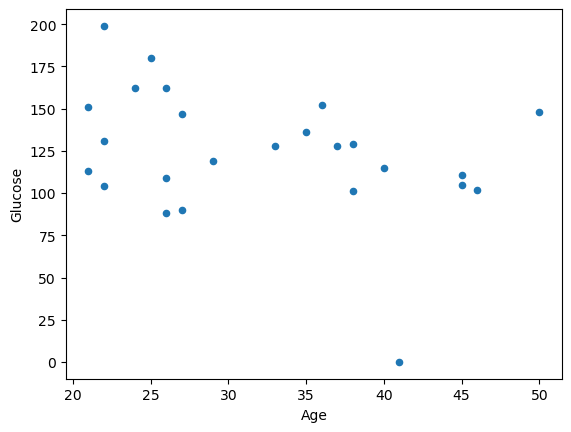

In [6]:
X1.plot.scatter(x='Age', y='Glucose')
plt.xlabel("Age")
plt.ylabel("Glucose")
httac=plt.gcf()
plt.show()

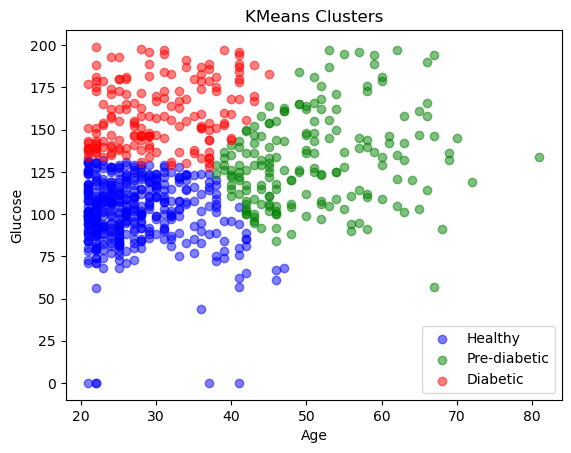

In [7]:

# Choose relevant columns and standardize the data
cols = ['Age', 'Glucose']
scaler = StandardScaler()
X = scaler.fit_transform(data[cols])

# Perform KMeans clustering with optimal number of clusters
n_clusters = 3 # chosen based on elbow method
kmeans = KMeans(n_clusters, init='k-means++')
kmeans.fit(X)
data['cluster_label'] = kmeans.predict(X)

# Plot the clusters
colors = ['blue', 'green', 'red']
labels = ['Healthy', 'Pre-diabetic', 'Diabetic']
for i, label in enumerate(labels):
    plt.scatter(data[data['cluster_label']==i]['Age'], 
                data[data['cluster_label']==i]['Glucose'], 
                c=colors[i], label=label, alpha=0.5)
plt.title('KMeans Clusters')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.legend()
plt.show()


In [11]:
#Data Cleaning
df_new = data.copy()  # Make a copy of the original DataFrame
df_new = df_new.drop("cluster_label", axis=1)
# Replace zero values with NaN
df_new[["Age", "Glucose", "BloodPressure", "Insulin", "BMI"]] = df_new[["Age", "Glucose", "BloodPressure", "Insulin", "BMI"]].replace(0, np.NaN)


In [12]:
#count of Nan
df_new.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness                 0
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [13]:
#replacing NaN with mean values
df_new["Glucose"].fillna(df_new["Glucose"].mean(), inplace = True)
df_new["BloodPressure"].fillna(df_new["BloodPressure"].mean(), inplace = True)
df_new["Insulin"].fillna(df_new["Insulin"].mean(), inplace = True)
df_new["BMI"].fillna(df_new["BMI"].mean(), inplace = True)

In [17]:
#checking null values
df_new.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
#Spliting Data
X=df_new.drop('Outcome',axis=1)
y=df_new['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
print(X.shape)
print(y.shape)


(768, 8)
(768,)


In [18]:
#spliting X and y
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.20,random_state=0,stratify=df_new['Outcome'])

In [22]:
#Model Building
model = LogisticRegression(max_iter=1000)
model.fit(X_scaled,y)

LogisticRegression(max_iter=1000)

In [39]:
#Training Time
start_time = time.time()
model.fit(X_train, Y_train)
training_time = time.time() - start_time
#Testing Time
start_time = time.time()
y_pred = model.predict(X_test)
testing_time = time.time() - start_time

In [34]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [36]:
accuracy = accuracy_score(Y_test, y_test_pred)
train_accuracy = accuracy_score(Y_train, y_train_pred)
test_accuracy = accuracy_score(Y_test, y_test_pred)

In [40]:
print("Accuracy:", round(accuracy,2)*100,'%')
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)
print("Training time:", training_time)
print("Testing time:", testing_time)

Accuracy: 76.0 %
Training accuracy: 0.7752442996742671
Testing accuracy: 0.7597402597402597
Training time: 0.07079911231994629
Testing time: 0.0019943714141845703


In [45]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[75, 25],
       [23, 31]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Heatmap')

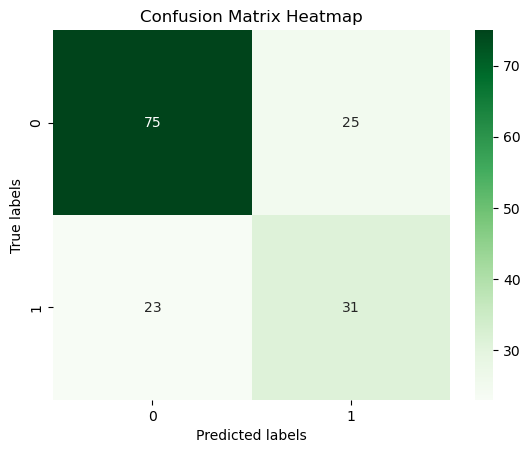

In [47]:
#heatmap of confusion matrix
sns.heatmap(pd.DataFrame(cm),annot=True, cmap="Greens")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap')

In [41]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
# Measure the training time
start_time = time.time()
clf.fit(X_train, Y_train)
training_time = time.time() - start_time

# Measure the testing time
start_time = time.time()
y_pred = clf.predict(X_test)
testing_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", round(accuracy, 2) * 100, "%")
print("Training time:", round(training_time, 2), "seconds")
print("Testing time:", round(testing_time, 2), "seconds")

Accuracy: 69.0 %
Training time: 0.01 seconds
Testing time: 0.01 seconds


In [137]:
feature_names = list(X.columns)
user_input = {}

for feature_name in feature_names:
    value = input(f"Enter value for {feature_name}: ")
    user_input[feature_name] = float(value)

user_input_df = pd.DataFrame(user_input, index=[0])
user_input_scaled = scaler.transform(user_input_df)

prediction = model.predict(user_input_scaled)

if prediction[0] == 1:
    result = "User Input suggests that they might have \033[1;3m' diabetes  '\033[0m "
else:
    result = "User Input suggests that the individual is likely to have \033[1;3m' no diabetes '\033[0m "

print("Prediction:", result)

Enter value for Pregnancies: 6
Enter value for Glucose: 148
Enter value for BloodPressure: 72
Enter value for SkinThickness: 35
Enter value for Insulin: 92
Enter value for BMI: 33.6
Enter value for DiabetesPedigreeFunction: 0.627
Enter value for Age: 55
Enter value for cluster_label: 3
Prediction: User Input suggests that they might have ' diabetes  ' 
